In [1]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
# List all physical devices recognized by TensorFlow
physical_devices = tf.config.list_physical_devices('GPU')
print("Available GPUs:", physical_devices)
if gpus :
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        tf.config.experimental.set_virtual_device_configuration(gpus[0],[tf.config.experimental.VirtualDeviceConfiguration(memory_limit=1024 * 4)])

    except RuntimeError as e:
        print(e)

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2024-09-24 02:36:59.400591: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-24 02:36:59.400695: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-24 02:36:59.404986: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-24 02:36:59.429398: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Available GPUs: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
2.15.0


2024-09-24 02:37:07.041405: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-09-24 02:37:07.069661: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-09-24 02:37:07.074620: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

# **Uploading file from your directory**
 The file you upload should be a zip folder containing your dataset.
This code below will prompt you to select and upload the zip file from your local computer into colab directory

In [2]:
#comment out cell if using a local machine

# from google.colab import files
# uploaded = files.upload()


# **Unziping the Folder in Colab**
Here you should be able to see the extracted zip folder in your colab folder directory

In [3]:
#comment out cell if using a local machine

# import zipfile

# for filename in uploaded.keys():
#     if filename.endswith('.zip'):
#         zip_ref = zipfile.ZipFile(filename, 'r')
#         zip_ref.extractall()
#         print(f"Extracted folder correctly {filename}")
#         zip_ref.close()


# **Import Libraries**

In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import random
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

##  **Preparing and getting the file directories**
Here we are getting the folder directories for the Car and Bike folder which is found in the parent folder called Car-Bike-Dataset which we have already extracted above from our zip folder if we used Colab environment. With your local machine it should open the current directory where your dataset is located and point to it.

In [5]:
# if using local machine, ensure that the zip file has been unzipped in the same
#folder as the one which has this notebook

# Get the current directory
current_dir = os.getcwd()
print("Current directory:", current_dir)

# Set the correct target folder path
target_folder = os.path.join(current_dir, "Car-Bike-Dataset")
print("Target folder path:", target_folder)



Current directory: /tf/notebooks
Target folder path: /tf/notebooks/Car-Bike-Dataset


## Getting the path for the training and test images for the Car and bike

In [6]:
# Define the actual train and test paths for both Car and Bike
car_train_folder = os.path.join(target_folder, "Car", "train_images")
car_test_folder = os.path.join(target_folder, "Car", "test_images")
bike_train_folder = os.path.join(target_folder, "Bike", "train_images")
bike_test_folder = os.path.join(target_folder, "Bike", "test_images")

print("Car train data path:", car_train_folder)
print("Car test data path:", car_test_folder)
print("Bike train data path:", bike_train_folder)
print("Bike test data path:", bike_test_folder)

Car train data path: /tf/notebooks/Car-Bike-Dataset/Car/train_images
Car test data path: /tf/notebooks/Car-Bike-Dataset/Car/test_images
Bike train data path: /tf/notebooks/Car-Bike-Dataset/Bike/train_images
Bike test data path: /tf/notebooks/Car-Bike-Dataset/Bike/test_images


In [7]:
IMAGE_SIZE = 150

# Getting and loading the dataset
Here, this function below will help us load the dataset we obatined above for the car_folder and bike_folder respectively

In [8]:
# Function to load dataset
def load_dataset(folder, label):
    data = []
    labels = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        try:
            image = load_img(img_path, target_size=(IMAGE_SIZE, IMAGE_SIZE))
            image = img_to_array(image) / 255.0
            data.append(image)
            labels.append(label)
        except Exception as e:
            print(f"Error loading {img_path}: {e}")

    return np.array(data), np.array(labels)

## Load the data

In [9]:
# Load training data
train_images_car, train_labels_car = load_dataset(car_train_folder, 1)
train_images_bike, train_labels_bike = load_dataset(bike_train_folder, 0)

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [10]:
# Load testing data
test_images_car, test_labels_car = load_dataset(car_test_folder, 1)
test_images_bike, test_labels_bike = load_dataset(bike_test_folder, 0)

In [11]:
# Combine training data
train_images = np.concatenate([train_images_car, train_images_bike])
train_labels = np.concatenate([train_labels_car, train_labels_bike])

# Combine testing data
test_images = np.concatenate([test_images_car, test_images_bike])
test_labels = np.concatenate([test_labels_car, test_labels_bike])

## Check the number of images loaded for training and testing

In [12]:
print(f"Number of training images: {len(train_images)}")
print(f"Number of test images: {len(test_images)}")

Number of training images: 900
Number of test images: 100


## Displaying sample images for Car and Bike

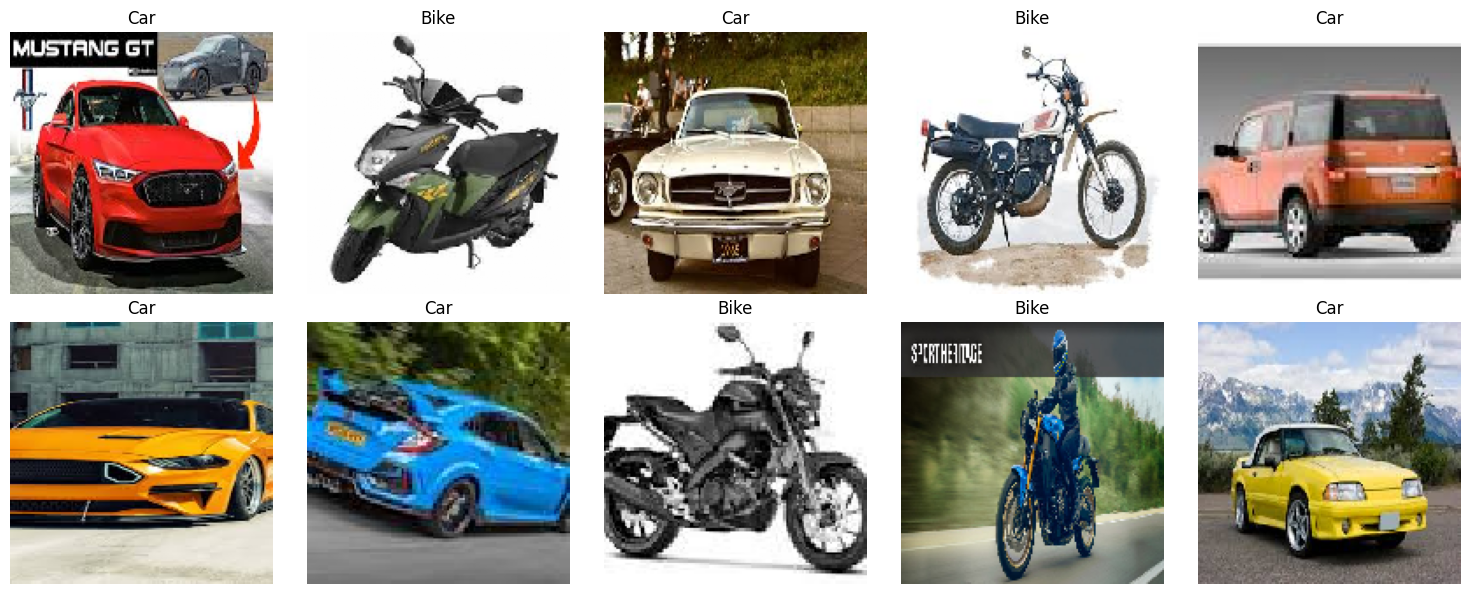

In [13]:
# Function to plot 5 sample images
def plot_sample_images(images, labels, num_samples=10, images_per_row=5):
    num_rows = (num_samples + images_per_row - 1) // images_per_row
    plt.figure(figsize=(images_per_row * 3, num_rows * 3))

    indices = random.sample(range(len(images)), num_samples)

    for i, index in enumerate(indices):
        plt.subplot(num_rows, images_per_row, i + 1)
        plt.imshow(images[index])
        label = 'Car' if labels[index] == 1 else 'Bike'
        plt.title(label)
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Plot 10 sample images (5 images per row)
plot_sample_images(train_images, train_labels, num_samples=10, images_per_row=5)


In [17]:
train_images_car.shape

(450, 150, 150, 3)

<!-- ## Split the data into train and test sets
To help our model learn correctly we are splitting the dataset into 90% training and 10% testing -->

# Define your model for training

In [18]:
#Build your model
model = tf.keras.models.Sequential([
    keras.layers.Conv2D(kernel_size=3, filters=12, activation='relu', padding='same', input_shape=(150, 150, 3)),
    # keras.layers.MaxPooling2D(pool_size=(2, 2)),
    
    keras.layers.Conv2D(kernel_size=6, filters=24, activation='relu', padding='same', strides=2),
    # keras.layers.MaxPooling2D(pool_size=(2, 2)),
    
    keras.layers.Conv2D(kernel_size=6, filters=32, activation='relu', padding='same', strides=2),
    
    keras.layers.Flatten(),
    
    keras.layers.Dense(200, activation='relu'),
    keras.layers.Dropout(0.6),
    
    keras.layers.Dense(1, activation='sigmoid')
])
model.summary()

2024-09-24 02:42:30.078348: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-09-24 02:42:30.083433: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-09-24 02:42:30.088292: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 12)      336       
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 24)        10392     
                                                                 
 conv2d_2 (Conv2D)           (None, 38, 38, 32)        27680     
                                                                 
 flatten (Flatten)           (None, 46208)             0         
                                                                 
 dense (Dense)               (None, 200)               9241800   
                                                                 
 dropout (Dropout)           (None, 200)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 2

# Compiling the model

In [19]:
#Feel free to update optimizer

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

##  Train the model

In [20]:
#Feel free to update hyperparameters

history = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=32,
    validation_split=0.1
)

Epoch 1/20


2024-09-24 02:43:23.073306: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8906
2024-09-24 02:43:28.363052: I external/local_xla/xla/service/service.cc:168] XLA service 0x7fe24c72ffd0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-09-24 02:43:28.363133: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3090, Compute Capability 8.6
2024-09-24 02:43:28.385610: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1727145808.722885  224823 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


26/26 [==============================] - 16s 86ms/step - loss: 0.7036 - accuracy: 0.5827 - val_loss: 0.6251 - val_accuracy: 0.7444
Epoch 2/20
26/26 [==============================] - 1s 22ms/step - loss: 0.4764 - accuracy: 0.7938 - val_loss: 0.1269 - val_accuracy: 0.9444
Epoch 3/20
26/26 [==============================] - 1s 22ms/step - loss: 0.2723 - accuracy: 0.8914 - val_loss: 0.3882 - val_accuracy: 0.8889
Epoch 4/20
26/26 [==============================] - 1s 21ms/step - loss: 0.1570 - accuracy: 0.9420 - val_loss: 0.2465 - val_accuracy: 0.9333
Epoch 5/20
26/26 [==============================] - 1s 23ms/step - loss: 0.0615 - accuracy: 0.9753 - val_loss: 0.6346 - val_accuracy: 0.8333
Epoch 6/20
26/26 [==============================] - 1s 21ms/step - loss: 0.0763 - accuracy: 0.9741 - val_loss: 0.4478 - val_accuracy: 0.8889
Epoch 7/20
26/26 [==============================] - 1s 20ms/step - loss: 0.0740 - accuracy: 0.9753 - val_loss: 0.3538 - val_accuracy: 0.8889
Epoch 8/20
26/26 [=====

## Evaluating the model
Here we evaluate the model on the test set to see the final accuracy

In [22]:
# Evaluate the model on the test set (validation set)

test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=2)
print(f"Test Set Accuracy: {test_accuracy * 100:.2f}%")


4/4 - 0s - loss: 0.3703 - accuracy: 0.9200 - 109ms/epoch - 27ms/step
Test Set Accuracy: 92.00%


## Visualization of Training and Validation Loss and Accuracy
The plots provide a visual representation of the model's training process over multiple epochs.

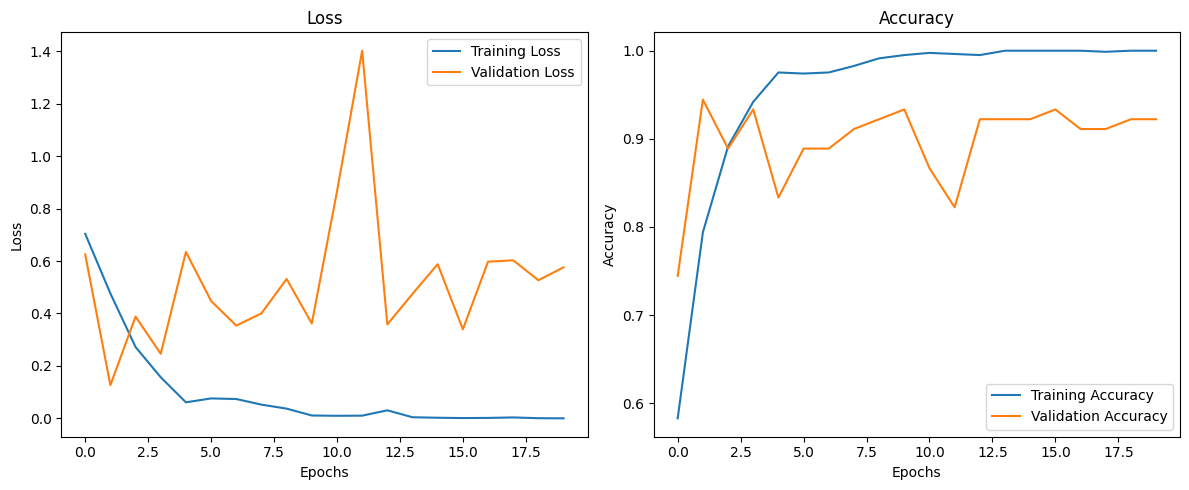

In [23]:

plt.figure(figsize=(12, 5))

# Plot training & validation loss values
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


## Getting to see the predicted images for both car and bike
Here, based on how well the model was able to train you will be able to see if predicting 90% accurately from the test images

1/1 [==============================] - 0s 64ms/step


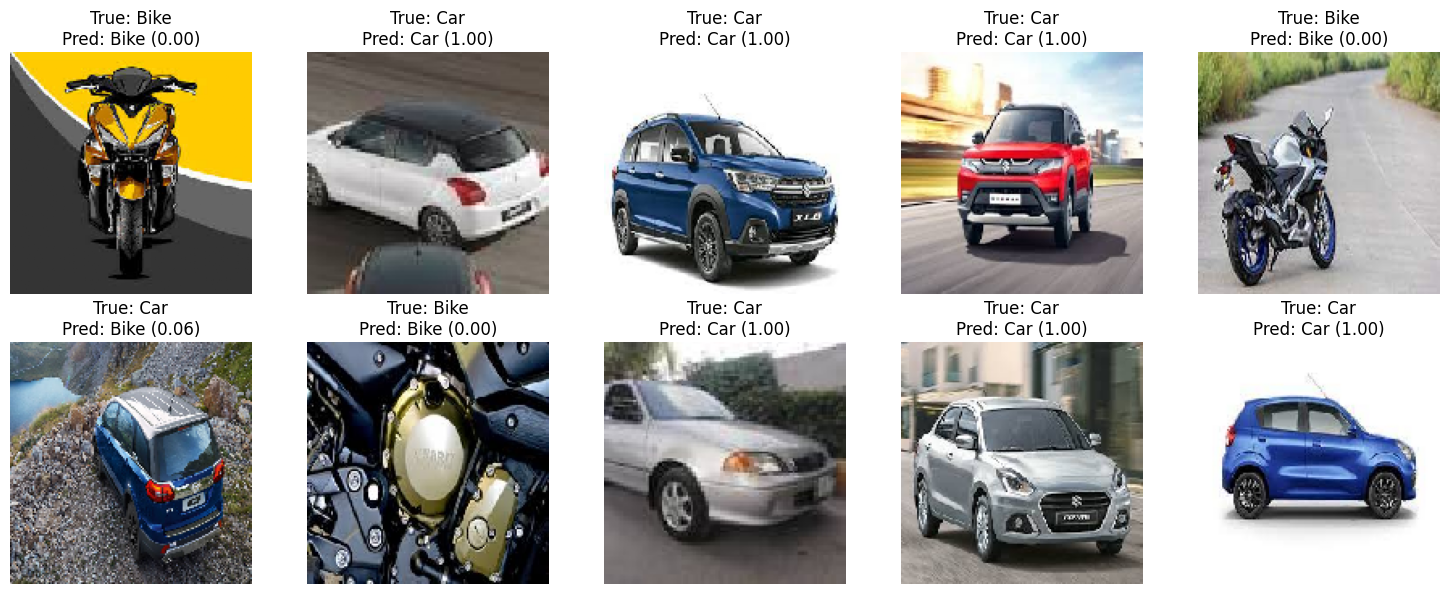

In [24]:
# Function to predict and visualize multiple images from the test set
def predict_and_visualize_multiple(model, test_images, test_labels, num_samples=10, images_per_row=5):
    num_rows = (num_samples + images_per_row - 1) // images_per_row
    plt.figure(figsize=(images_per_row * 3, num_rows * 3))

    # Randomly sample indices from the test set
    indices = random.sample(range(len(test_images)), num_samples)

    for i, index in enumerate(indices):
        plt.subplot(num_rows, images_per_row, i + 1)
        img = test_images[index]
        true_label = 'Car' if test_labels[index] == 1 else 'Bike'

        # Expand the dimensions for model prediction
        img_array = np.expand_dims(img, axis=0)

        # Predict the label
        prediction = model.predict(img_array)
        predicted_label = 'Car' if prediction[0][0] > 0.5 else 'Bike'
        probability = prediction[0][0]

        # Display the image and the prediction
        plt.imshow(img)
        plt.title(f"True: {true_label}\nPred: {predicted_label} ({probability:.2f})")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Call the function to predict and visualize 10 random images from the test set
predict_and_visualize_multiple(model, test_images, test_labels, num_samples=10, images_per_row=5)

